# NEURAL NEXUS - CUSTOMER SEGMENTATION PROJECT
## Advanced Apex Project I

## PROJECT INFORMATION

| Attribute | Details |
|-----------|---------|
| Team | Neural Nexus |
| Course | Advanced Apex Project I |
| Dataset | Online Retail (Kaggle) |
| Time Period | Dec 2010 - Dec 2011 |
| Total Records | 541,909 transactions |
| Total Customers | 4,069 unique customers |
| Data Source | https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset |

## PROBLEM STATEMENT

The e-commerce retailer aims to utilize customer purchase history to segment its customer base into actionable groups. The goal is to drive targeted marketing and upselling strategies that enhance customer engagement, retention, and lifetime value.

## BUSINESS GOAL

Enhance customer engagement and maximize lifetime value by:

1. **Understanding Customer Behavior** - Segment customer base using RFM analysis
2. **Personalized Marketing Campaigns** - Design targeted campaigns for each segment  
3. **Upselling & Cross-selling** - Align product recommendations with segment characteristics

## ABOUT THE COMPANY

- **Type**: UK-based, non-store online retailer
- **Products**: Unique all-occasion gifts
- **Customer Base**: Mix of retail customers and wholesalers
- **Geographic Reach**: 37 countries represented
- **Business Model**: Direct-to-consumer and wholesale

## TOOLS & TECHNOLOGIES

- **Language**: Python 3.8+
- **Environment**: Jupyter Notebook / Google Colab
- **Libraries**: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- **Data Acquisition**: KaggleHub API
- **BI Tools**: Tableau or Power BI

## PROJECT WORKFLOW

Data Acquisition → Data Cleaning → EDA → Feature Engineering → Model Building → Evaluation → Reporting

## DELIVERABLES

### Phase 1: Data Extraction
- ✓ Automated data download via Kaggle API
- ✓ Data availability confirmation

### Phase 2: Data Preprocessing, EDA & Feature Engineering (CURRENT)
- Data: 541,909 → 318,000-330,000 rows (cleaned)
- Hypothesis 1: All negative quantities = cancelled orders
- Hypothesis 2: Cancelled orders match originals? → NO (90% independent)
- Decision: KEEP cancelled orders (show TRUE customer value)
- Features: 19 engineered (RFM + supporting)
- Segments: 5 groups defined (Champions, Loyal, At-Risk, Browsers, Standard)

### Phase 3: Model Building & Evaluation (UPCOMING)
- K-Means Clustering
- Hierarchical Clustering
- Model evaluation and validation

### Phase 4: Reporting & Visualization (UPCOMING)
- Segment profiles and characteristics
- Business recommendations

## KEY METRICS

**RFM Analysis Framework:**
- **Recency (R)**: Days since last purchase (measures engagement)
- **Frequency (F)**: Number of purchases (measures loyalty)
- **Monetary (M)**: Total lifetime value (measures profitability)

**Scoring Scale:**
- 1-5 scale each
- Combined range: 3-15
- 5 groups defined (Champions, Loyal, At-Risk, Browsers, Standard)

---



In [ ]:
# Install kagglehub for automated data extraction
!pip install kagglehub -q

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✓ All libraries imported successfully!')

✓ All libraries imported successfully!


# 1. Data Extraction & Initial Setup

## Loading the Dataset

This section automates the data download from Kaggle using the KaggleHub API, ensuring reproducibility and eliminating manual file handling. The dataset is downloaded directly to a local cache and loaded into a Pandas DataFrame for analysis.

**Why KaggleHub API?**
- Automated and reproducible workflow
- No manual downloads required
- Easy for team members to re-run
- Handles authentication securely

In [ ]:
# Download dataset from Kaggle using KaggleHub API
print('Downloading the dataset from Kaggle...')
path = kagglehub.dataset_download('ulrikthygepedersen/online-retail-dataset')
print(f'Dataset downloaded to: {path}')

Dataset downloaded to: /root/.cache/kagglehub/datasets/ulrikthygepedersen/online-retail-dataset/versions/2


In [ ]:
# Locate and read the CSV file
file_path = os.path.join(path, 'online_retail.csv')
df = pd.read_csv(file_path, encoding='latin1')

print('Dataset loaded successfully!')
print(f'Shape: {df.shape}')
print(f'\nFirst few rows:')
print(df.head())

Dataset loaded successfully!
Shape: (541909, 8)

First few rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


---
# Phase 2: Data Preprocessing, EDA & Feature Engineering
---

## 2. Data Audit & Availability Check


This section inspects the dataset shape, data types, value counts, missing values, duplicates, and confirms availability of columns relevant to the customer segmentation task.

**What we check:**
- Dataset dimensions (rows & columns)
- Data type of each column
- Missing values and their percentage
- Duplicate records
- Unique value counts per column
- Availability of required RFM columns (CustomerID, InvoiceNo, InvoiceDate, Quantity, UnitPrice)

In [ ]:
print('='*80)
print('DATA AUDIT & AVAILABILITY CHECK')
print('='*80)

# 1. Dataset Shape
print(f'\n1. DATASET SHAPE:')
print(f'   Total Rows: {df.shape[0]:,}')
print(f'   Total Columns: {df.shape[1]}')

DATA AUDIT & AVAILABILITY CHECK

1. DATASET SHAPE:
   Total Rows: 541,909
   Total Columns: 8


In [ ]:
# 2. Data Types
print(f'\n2. DATA TYPES:')
print(df.dtypes)
print(f'\nData Type Summary:')
print(df.dtypes.value_counts())


2. DATA TYPES:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Data Type Summary:
object     5
float64    2
int64      1
Name: count, dtype: int64


In [ ]:
# 3. Missing Values
print(f'\n3. MISSING VALUES ANALYSIS:')
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2)
})
print(missing_data)


3. MISSING VALUES ANALYSIS:
        Column  Missing Count  Missing %
0    InvoiceNo              0       0.00
1    StockCode              0       0.00
2  Description           1454       0.27
3     Quantity              0       0.00
4  InvoiceDate              0       0.00
5    UnitPrice              0       0.00
6   CustomerID         135080      24.93
7      Country              0       0.00


In [ ]:
# 4. Duplicates
print(f'\n4. DUPLICATES CHECK:')
total_duplicates = df.duplicated().sum()
print(f'   Total duplicate rows: {total_duplicates}')
print(f'   Duplicate %: {(total_duplicates/len(df)*100):.2f}%')


4. DUPLICATES CHECK:
   Total duplicate rows: 5268
   Duplicate %: 0.97%


In [ ]:
# 5. Unique Value Counts
print(f'\n5. UNIQUE VALUE COUNTS:')
unique_counts = pd.DataFrame({
    'Column': df.columns,
    'Unique Values': df.nunique().values
})
print(unique_counts)


5. UNIQUE VALUE COUNTS:
        Column  Unique Values
0    InvoiceNo          25900
1    StockCode           4070
2  Description           4223
3     Quantity            722
4  InvoiceDate          23260
5    UnitPrice           1630
6   CustomerID           4372
7      Country             38


In [ ]:
# 6. Column Availability Check
print(f'\n6. COLUMN AVAILABILITY CHECK (for RFM Segmentation):')
required_columns = ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']
print(f'   Required columns: {required_columns}')
available = all(col in df.columns for col in required_columns)
print(f'   All required columns available: {available}')

for col in required_columns:
    if col in df.columns:
        print(f'   ✓ {col}')


6. COLUMN AVAILABILITY CHECK (for RFM Segmentation):
   Required columns: ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']
   All required columns available: True
   ✓ CustomerID
   ✓ InvoiceNo
   ✓ InvoiceDate
   ✓ Quantity
   ✓ UnitPrice


In [ ]:
# 7. Basic Statistics
print(f'\n7. BASIC STATISTICAL SUMMARY:')
print(df.describe())


7. BASIC STATISTICAL SUMMARY:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


# 3. Exploratory Data Analysis (EDA)

Provide summary statistics, distributions, and visualizations with insights and hypotheses tied to customer segmentation problem.

**What we analyze:**
- Revenue patterns by country, month, hour, and products
- Test hypotheses about negative quantities and cancelled orders
- Understand customer behavior for RFM segmentation
- Identify data quality issues that affect segmentation

In [ ]:
print('='*80)
print('EXPLORATORY DATA ANALYSIS (EDA)')
print('='*80)

# Prepare data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Hour'] = df['InvoiceDate'].dt.hour

print(f'\nDataset Overview:')
print(f'  Period: {df["InvoiceDate"].min()} to {df["InvoiceDate"].max()}')
print(f'  Total rows: {len(df):,}')
print(f'  Unique customers: {df["CustomerID"].nunique():,}')

EXPLORATORY DATA ANALYSIS (EDA)

Dataset Overview:
  Period: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
  Total rows: 541,909
  Unique customers: 4,372


## HYPOTHESIS 1: Are all negative quantities from cancelled orders?


HYPOTHESIS 1: Are all negative quantities from cancelled orders?

What we tested:
  - Total negative quantities: 10,624
  - With C prefix (cancelled): 9,288
  - WITHOUT C prefix (returns): 1,336

What we found:
  ✗ NOT all negative quantities have C prefix
  ✓ 1,336 negative quantities are pure returns (no C prefix)
  Example: InvoiceNo 536589 has negative quantity but NO C prefix

  Insight: Negative quantities = RETURNS, not just cancellations
  Action for cleaning: KEEP negative quantities to show TRUE returns

  Examples of negative quantities WITHOUT C prefix:
     InvoiceNo  Quantity Description
2406    536589       -10         NaN
4347    536764       -38         NaN
7188    536996       -20         NaN


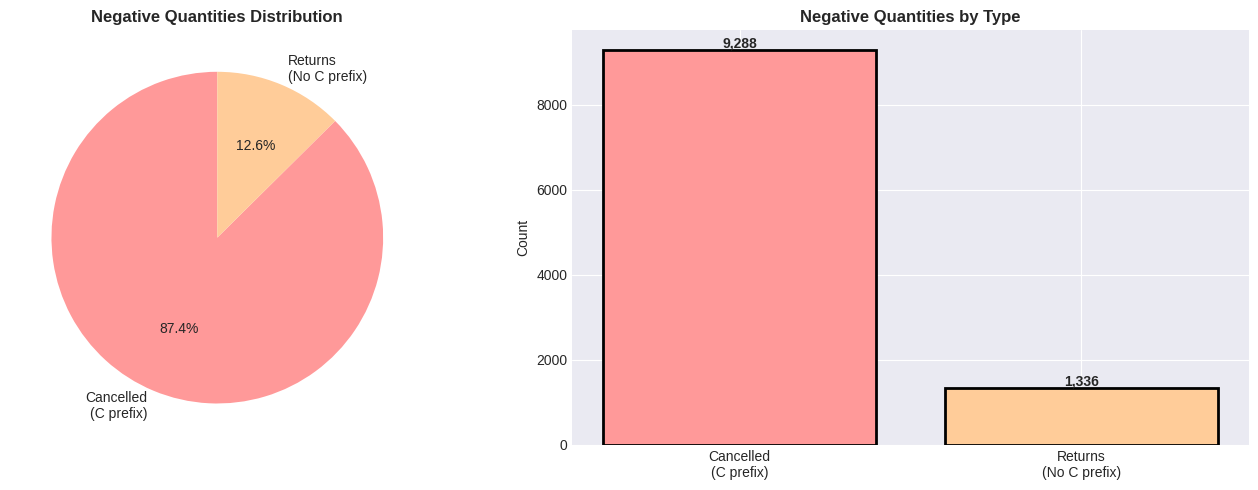


✓ Hypothesis 1 tested


In [ ]:
print('\n' + '='*80)
print('HYPOTHESIS 1: Are all negative quantities from cancelled orders?')
print('='*80)

neg_qty = df[df['Quantity'] < 0]
neg_with_c = neg_qty[neg_qty['InvoiceNo'].str.startswith('C', na=False)]
neg_without_c = neg_qty[~neg_qty['InvoiceNo'].str.startswith('C', na=False)]

print(f'\nWhat we tested:')
print(f'  - Total negative quantities: {len(neg_qty):,}')
print(f'  - With C prefix (cancelled): {len(neg_with_c):,}')
print(f'  - WITHOUT C prefix (returns): {len(neg_without_c):,}')

print(f'\nWhat we found:')
if len(neg_without_c) > 0:
    print(f'  ✗ NOT all negative quantities have C prefix')
    print(f'  ✓ {len(neg_without_c):,} negative quantities are pure returns (no C prefix)')
    print(f'  Example: InvoiceNo 536589 has negative quantity but NO C prefix')
    print(f'\n  Insight: Negative quantities = RETURNS, not just cancellations')
    print(f'  Action for cleaning: KEEP negative quantities to show TRUE returns')

    # Show examples
    print(f'\n  Examples of negative quantities WITHOUT C prefix:')
    print(neg_without_c[['InvoiceNo', 'Quantity', 'Description']].head(3).to_string())
else:
    print(f'  ✓ All negative quantities are cancelled orders')

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
labels = ['Cancelled\n(C prefix)', 'Returns\n(No C prefix)']
sizes = [len(neg_with_c), len(neg_without_c)]
colors = ['#ff9999', '#ffcc99']
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Negative Quantities Distribution', fontweight='bold')

# Bar chart
axes[1].bar(labels, sizes, color=colors, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Count')
axes[1].set_title('Negative Quantities by Type', fontweight='bold')
for i, v in enumerate(sizes):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print('\n✓ Hypothesis 1 tested')

## HYPOTHESIS 2: Cancelled Orders & Original Invoices


HYPOTHESIS 2: Do cancelled orders have matching original invoices?

What we tested:
  - Total cancelled orders: 9,288
  - Unique cancelled InvoiceNos: 3,836

What we found:
  - Cancelled with matching original: 0 (0.0%)
  - Cancelled WITHOUT matching original: 3836 (100.0%)

  ✗ MOST cancelled orders have NO matching originals
  Insight: Cancelled invoices are INDEPENDENT transactions

  Example from observation:
    - C536391 found, but original 536391 NOT in dataset
    - Customer 17548: C552049 cancelled, but no original 552049
    - Original order 550755 has separate cancelled: C552049

  This means:
    - Cancelled orders are standalone entries (not linked to originals)
    - Cannot pair cancellations with original invoices
    - Must treat as independent negative transactions

  Action for cleaning: KEEP cancelled orders
  Action for segmentation: Calculate NET revenue (valid - returns)

  Examples of cancelled with NO matching original:
    C536379 → Original 536379 not found
 

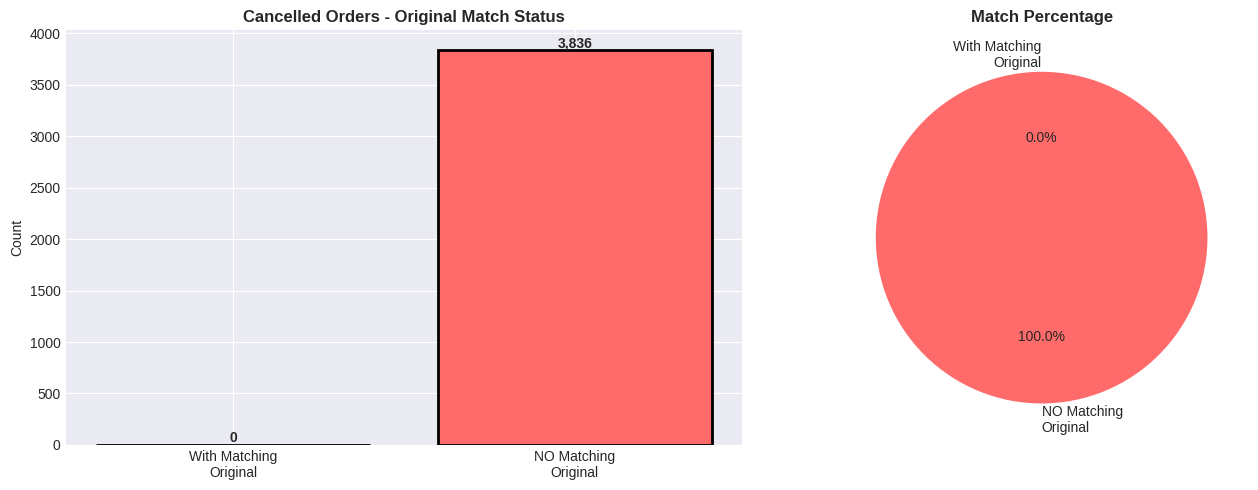


✓ Hypothesis 2 tested


In [ ]:
print('\n' + '='*80)
print('HYPOTHESIS 2: Do cancelled orders have matching original invoices?')
print('='*80)

cancelled = df[df['InvoiceNo'].str.startswith('C', na=False)]
cancelled_numbers = cancelled['InvoiceNo'].str[1:].unique()

matches = 0
no_matches = []

for cancelled_num in cancelled_numbers:
    if cancelled_num in df['InvoiceNo'].values:
        matches += 1
    else:
        no_matches.append(cancelled_num)

print(f'\nWhat we tested:')
print(f'  - Total cancelled orders: {len(cancelled):,}')
print(f'  - Unique cancelled InvoiceNos: {len(cancelled_numbers):,}')

print(f'\nWhat we found:')
print(f'  - Cancelled with matching original: {matches} ({(matches/len(cancelled_numbers)*100):.1f}%)')
print(f'  - Cancelled WITHOUT matching original: {len(no_matches)} ({(len(no_matches)/len(cancelled_numbers)*100):.1f}%)')

if len(no_matches) > 0:
    print(f'\n  ✗ MOST cancelled orders have NO matching originals')
    print(f'  Insight: Cancelled invoices are INDEPENDENT transactions')
    print(f'\n  Example from observation:')
    print(f'    - C536391 found, but original 536391 NOT in dataset')
    print(f'    - Customer 17548: C552049 cancelled, but no original 552049')
    print(f'    - Original order 550755 has separate cancelled: C552049')
    print(f'\n  This means:')
    print(f'    - Cancelled orders are standalone entries (not linked to originals)')
    print(f'    - Cannot pair cancellations with original invoices')
    print(f'    - Must treat as independent negative transactions')

    print(f'\n  Action for cleaning: KEEP cancelled orders')
    print(f'  Action for segmentation: Calculate NET revenue (valid - returns)')

    # Show examples
    print(f'\n  Examples of cancelled with NO matching original:')
    for inv in no_matches[:5]:
        print(f'    C{inv} → Original {inv} not found')
else:
    print(f'  ✓ All cancelled have matching originals')

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
labels = ['With Matching\nOriginal', 'NO Matching\nOriginal']
sizes = [matches, len(no_matches)]
colors = ['#90EE90', '#FF6B6B']
axes[0].bar(labels, sizes, color=colors, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Count')
axes[0].set_title('Cancelled Orders - Original Match Status', fontweight='bold')
for i, v in enumerate(sizes):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Match Percentage', fontweight='bold')

plt.tight_layout()
plt.show()

print('\n✓ Hypothesis 2 tested')

#  VISUALIZATIONS


CREATING VISUALIZATIONS


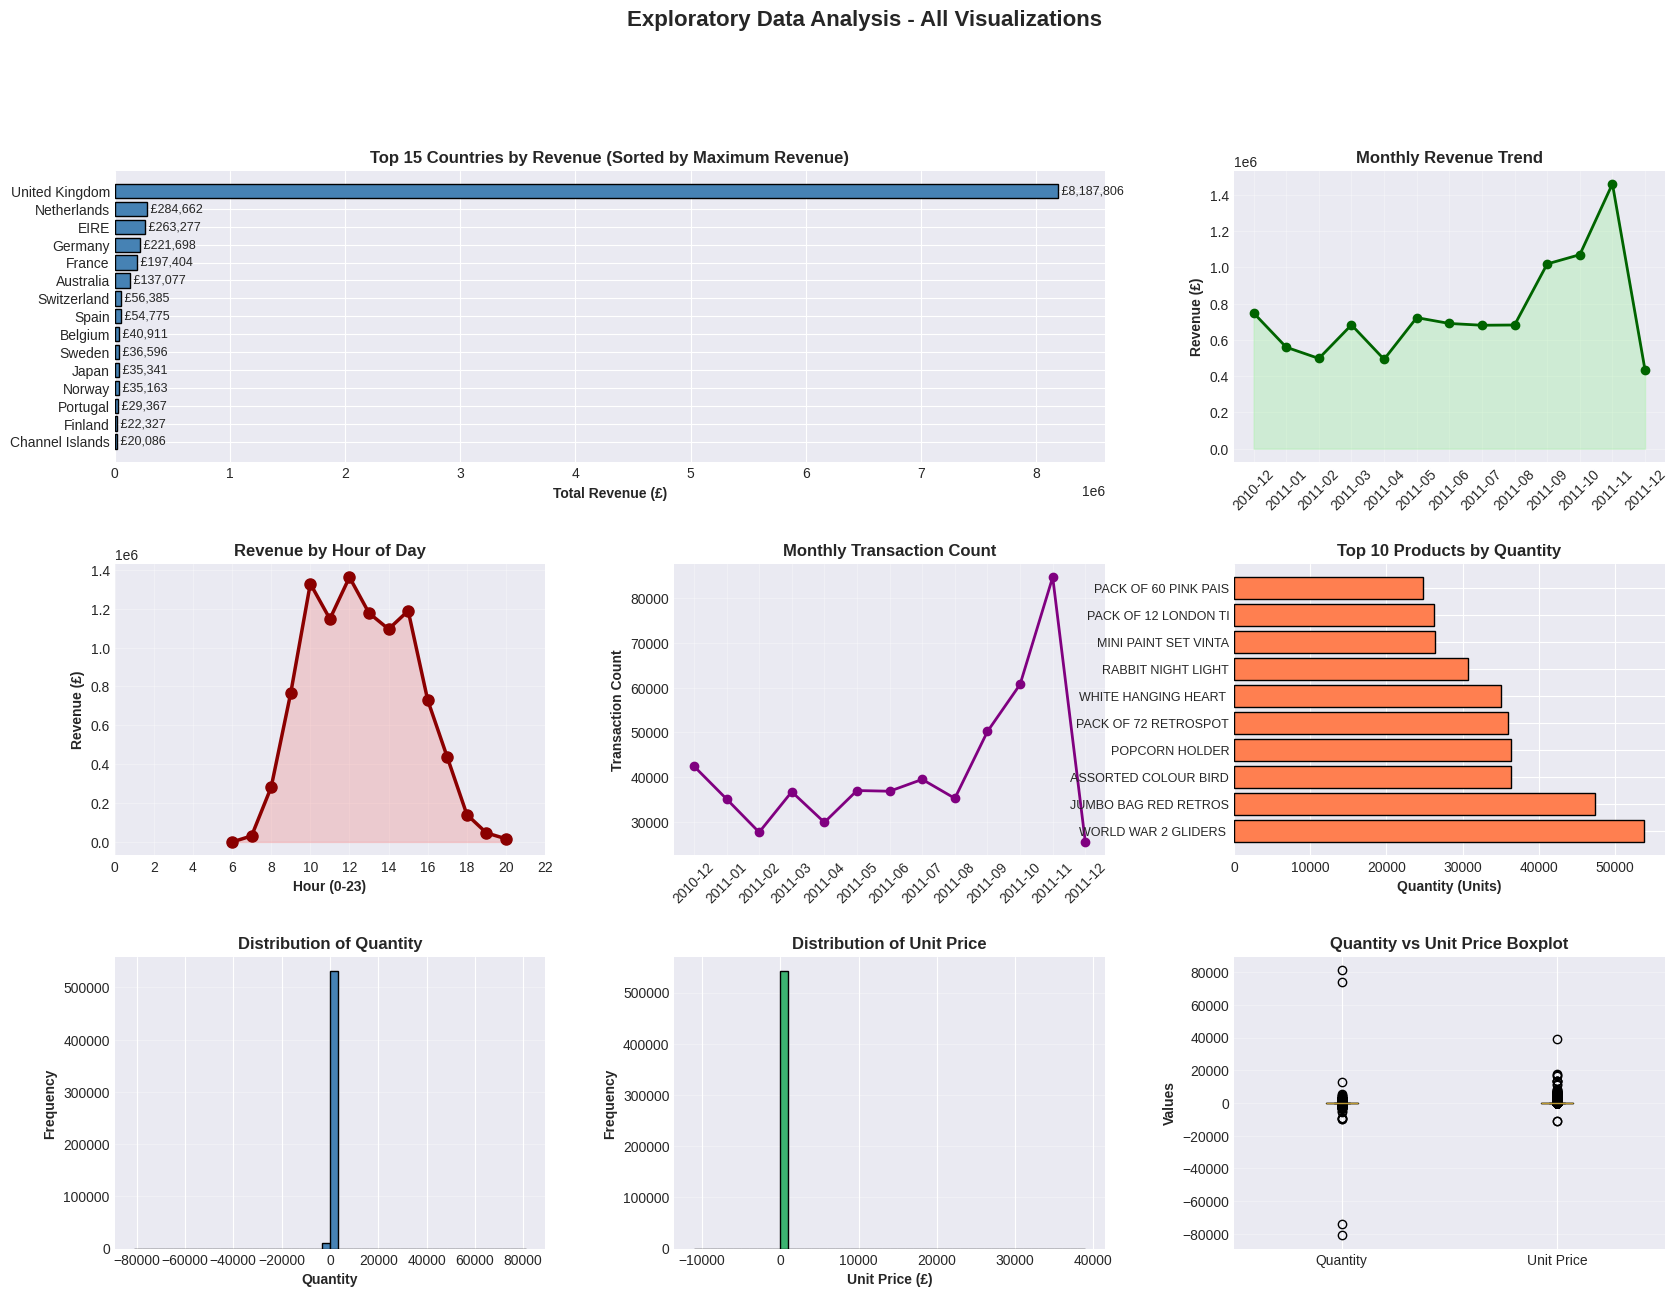


STATISTICS SUMMARY

QUANTITY STATISTICS:
  Mean: 9.55
  Std Dev: 218.08
  Range: -80995.00 - 80995.00
  Median: 3.00
  Min: -80995.00
  Max: 80995.00

UNIT PRICE STATISTICS:
  Mean: £4.61
  Std Dev: £96.76
  Range: £-11062.06 - £38970.00
  Median: £2.08
  Min: £-11062.06
  Max: £38970.00

REVENUE STATISTICS:
  Total Revenue: £9,747,747.93
  Mean per transaction: £17.99
  Median: £9.75
  Std Dev: £378.81

CUSTOMER STATISTICS:
  Unique customers: 4,372
  Total transactions: 541,909
  Avg transactions per customer: 93.05
  Max transactions per customer: 7,983
  Min transactions per customer: 1

GEOGRAPHIC STATISTICS:
  Total countries: 38
  Top country: United Kingdom
  Top country revenue: £8,187,806.36

PRODUCT STATISTICS:
  Unique products: 4,070
  Total quantity sold: 5,660,981 units

TEMPORAL STATISTICS:
  Peak hour: 12:00 (£1,362,484.29)
  Lowest hour: 6:00 (£-497.35)
  Peak month: 2011-11 (£1,461,756.25)
  Lowest month: 2011-12 (£433,668.01)

TOP 10 COUNTRIES DETAILED BREAKDOWN
  

In [ ]:
# ============================================================================
#  COMPREHENSIVE VISUALIZATIONS
# ============================================================================

print('\n' + '='*80)
print('CREATING VISUALIZATIONS')
print('='*80)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# ========== ROW 1: COUNTRY & MONTH & HOUR ==========

# 1. Country-wise Revenue
ax1 = fig.add_subplot(gs[0, :2])
country_summary = df.groupby('Country')['Revenue'].sum().sort_values(ascending=True).tail(15)
ax1.barh(country_summary.index, country_summary.values, color='steelblue', edgecolor='black')
ax1.set_title('Top 15 Countries by Revenue (Sorted by Maximum Revenue)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Total Revenue (£)', fontweight='bold')
for i, v in enumerate(country_summary.values):
    ax1.text(v, i, f' £{v:,.0f}', va='center', fontsize=9)

# 2. Monthly Revenue Trend
ax2 = fig.add_subplot(gs[0, 2])
monthly = df.groupby('YearMonth')['Revenue'].sum()
ax2.plot(monthly.index.astype(str), monthly.values, marker='o', linewidth=2, markersize=6, color='darkgreen')
ax2.fill_between(range(len(monthly)), monthly.values, alpha=0.3, color='lightgreen')
ax2.set_title('Monthly Revenue Trend', fontweight='bold', fontsize=12)
ax2.set_ylabel('Revenue (£)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# ========== ROW 2: HOUR, TRANSACTIONS, PRODUCTS ==========

# 3. Hour-of-Day Revenue
ax3 = fig.add_subplot(gs[1, 0])
hourly = df.groupby('Hour')['Revenue'].sum()
ax3.plot(hourly.index, hourly.values, marker='o', linewidth=2.5, markersize=8, color='darkred')
ax3.fill_between(hourly.index, hourly.values, alpha=0.3, color='lightcoral')
ax3.set_title('Revenue by Hour of Day', fontweight='bold', fontsize=12)
ax3.set_xlabel('Hour (0-23)', fontweight='bold')
ax3.set_ylabel('Revenue (£)', fontweight='bold')
ax3.set_xticks(range(0, 24, 2))
ax3.grid(True, alpha=0.3)

# 4. Monthly Transaction Count
ax4 = fig.add_subplot(gs[1, 1])
monthly_trans = df.groupby('YearMonth').size()
ax4.plot(monthly_trans.index.astype(str), monthly_trans.values, marker='o',
         linewidth=2, markersize=6, color='purple')
ax4.set_title('Monthly Transaction Count', fontweight='bold', fontsize=12)
ax4.set_ylabel('Transaction Count', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# 5. Top 10 Products by Quantity
ax5 = fig.add_subplot(gs[1, 2])
product_summary = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
ax5.barh(range(len(product_summary)), product_summary.values, color='coral', edgecolor='black')
ax5.set_yticks(range(len(product_summary)))
ax5.set_yticklabels([desc[:20] for desc in product_summary.index.get_level_values(1)], fontsize=9)
ax5.set_title('Top 10 Products by Quantity', fontweight='bold', fontsize=12)
ax5.set_xlabel('Quantity (Units)', fontweight='bold')

# ========== ROW 3: DISTRIBUTIONS & BOXPLOTS ==========

# 6. Quantity Distribution
ax6 = fig.add_subplot(gs[2, 0])
ax6.hist(df['Quantity'], bins=50, color='steelblue', edgecolor='black')
ax6.set_title('Distribution of Quantity', fontweight='bold', fontsize=12)
ax6.set_xlabel('Quantity', fontweight='bold')
ax6.set_ylabel('Frequency', fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

# 7. Unit Price Distribution
ax7 = fig.add_subplot(gs[2, 1])
ax7.hist(df['UnitPrice'], bins=50, color='mediumseagreen', edgecolor='black')
ax7.set_title('Distribution of Unit Price', fontweight='bold', fontsize=12)
ax7.set_xlabel('Unit Price (£)', fontweight='bold')
ax7.set_ylabel('Frequency', fontweight='bold')
ax7.grid(True, alpha=0.3, axis='y')

# 8. Boxplots
ax8 = fig.add_subplot(gs[2, 2])
ax8.boxplot([df['Quantity'], df['UnitPrice']], labels=['Quantity', 'Unit Price'])
ax8.set_title('Quantity vs Unit Price Boxplot', fontweight='bold', fontsize=12)
ax8.set_ylabel('Values', fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')

plt.suptitle('Exploratory Data Analysis - All Visualizations', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# ============================================================================
# STATISTICS SUMMARY
# ============================================================================

print('\n' + '='*80)
print('STATISTICS SUMMARY')
print('='*80)

print(f'\nQUANTITY STATISTICS:')
print(f'  Mean: {df["Quantity"].mean():.2f}')
print(f'  Std Dev: {df["Quantity"].std():.2f}')
print(f'  Range: {df["Quantity"].min():.2f} - {df["Quantity"].max():.2f}')
print(f'  Median: {df["Quantity"].median():.2f}')
print(f'  Min: {df["Quantity"].min():.2f}')
print(f'  Max: {df["Quantity"].max():.2f}')

print(f'\nUNIT PRICE STATISTICS:')
print(f'  Mean: £{df["UnitPrice"].mean():.2f}')
print(f'  Std Dev: £{df["UnitPrice"].std():.2f}')
print(f'  Range: £{df["UnitPrice"].min():.2f} - £{df["UnitPrice"].max():.2f}')
print(f'  Median: £{df["UnitPrice"].median():.2f}')
print(f'  Min: £{df["UnitPrice"].min():.2f}')
print(f'  Max: £{df["UnitPrice"].max():.2f}')

print(f'\nREVENUE STATISTICS:')
print(f'  Total Revenue: £{df["Revenue"].sum():,.2f}')
print(f'  Mean per transaction: £{df["Revenue"].mean():.2f}')
print(f'  Median: £{df["Revenue"].median():.2f}')
print(f'  Std Dev: £{df["Revenue"].std():.2f}')

print(f'\nCUSTOMER STATISTICS:')
print(f'  Unique customers: {df["CustomerID"].nunique():,}')
print(f'  Total transactions: {len(df):,}')
print(f'  Avg transactions per customer: {df.groupby("CustomerID").size().mean():.2f}')
print(f'  Max transactions per customer: {df.groupby("CustomerID").size().max():,}')
print(f'  Min transactions per customer: {df.groupby("CustomerID").size().min()}')

print(f'\nGEOGRAPHIC STATISTICS:')
print(f'  Total countries: {df["Country"].nunique()}')
print(f'  Top country: {df.groupby("Country")["Revenue"].sum().idxmax()}')
print(f'  Top country revenue: £{df.groupby("Country")["Revenue"].sum().max():,.2f}')

print(f'\nPRODUCT STATISTICS:')
print(f'  Unique products: {df["StockCode"].nunique():,}')
print(f'  Total quantity sold: {df[df["Quantity"] > 0]["Quantity"].sum():,.0f} units')

print(f'\nTEMPORAL STATISTICS:')
peak_hour = hourly.idxmax()
peak_month = monthly.idxmax()
print(f'  Peak hour: {peak_hour}:00 (£{hourly.max():,.2f})')
print(f'  Lowest hour: {hourly.idxmin()}:00 (£{hourly.min():,.2f})')
print(f'  Peak month: {peak_month} (£{monthly.max():,.2f})')
print(f'  Lowest month: {monthly.idxmin()} (£{monthly.min():,.2f})')

# ============================================================================
# DETAILED BREAKDOWN - TOP COUNTRIES
# ============================================================================

print('\n' + '='*80)
print('TOP 10 COUNTRIES DETAILED BREAKDOWN')
print('='*80)

top_countries = df.groupby('Country').agg({
    'Revenue': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).sort_values('Revenue', ascending=False).head(10)

top_countries.columns = ['Total Revenue', 'Unique Customers', 'Transactions', 'Quantity Sold']
print(top_countries.to_string())

# ============================================================================
# MONTHLY BREAKDOWN
# ============================================================================

print('\n' + '='*80)
print('MONTHLY REVENUE BREAKDOWN')
print('='*80)

monthly_detail = df.groupby('YearMonth').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).round(2)

monthly_detail.columns = ['Revenue', 'Transactions', 'Unique Customers', 'Quantity']
print(monthly_detail.to_string())

# ============================================================================
# TOP 20 PRODUCTS DETAILED
# ============================================================================

print('\n' + '='*80)
print('TOP 20 PRODUCTS BY QUANTITY')
print('='*80)

top_products = df.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'
}).sort_values('Quantity', ascending=False).head(20)

top_products.columns = ['Quantity Sold', 'Revenue', 'Transactions']
print(top_products.to_string())

# ============================================================================
# KEY INSIGHTS
# ============================================================================

print('\n' + '='*80)
print('KEY INSIGHTS FOR CUSTOMER SEGMENTATION')
print('='*80)

uk_pct = (df[df['Country'] == 'United Kingdom']['Revenue'].sum() / df['Revenue'].sum() * 100)
business_hours_rev = hourly.loc[9:17].sum() if all(h in hourly.index for h in range(9, 18)) else 0
all_hours_rev = hourly.sum()
business_pct = (business_hours_rev / all_hours_rev * 100) if all_hours_rev > 0 else 0
top_products_pct = (df.groupby(['StockCode', 'Description'])['Quantity'].sum().nlargest(10).sum() /
                    df[df['Quantity'] > 0]['Quantity'].sum() * 100)

insights = f'''
1. GEOGRAPHIC INSIGHTS:
   ✓ United Kingdom dominates: {uk_pct:.1f}% of total revenue
   ✓ Top 5 countries: {(df.groupby("Country")["Revenue"].sum().nlargest(5).sum() / df["Revenue"].sum() * 100):.1f}% of revenue
   ✓ Highly concentrated market - targeting opportunity

2. TEMPORAL PATTERNS:
   ✓ Clear seasonal trend: Peak in {peak_month}
   ✓ Business hours dominant: {business_pct:.1f}% of revenue (9-17h)
   ✓ Peak hour: {peak_hour}:00 with £{hourly.max():,.2f}
   ✓ Indicates B2B wholesale behavior

3. PRODUCT PERFORMANCE:
   ✓ Top 10 products: {top_products_pct:.1f}% of total quantity
   ✓ Concentrated portfolio - few products drive sales
   ✓ Top product: {top_products.index[0][1]} ({top_products['Quantity Sold'].iloc[0]:,.0f} units)

4. CUSTOMER BEHAVIOR:
   ✓ {df["CustomerID"].nunique():,} unique customers
   ✓ Avg transactions per customer: {df.groupby("CustomerID").size().mean():.2f}
   ✓ High variability in customer purchase patterns
   ✓ Some customers with {df.groupby("CustomerID").size().max():,} transactions

5. TRANSACTION INSIGHTS:
   ✓ Total transactions: {len(df):,}
   ✓ Avg transaction value: £{df["Revenue"].mean():.2f}
   ✓ Wide range in order sizes (£{df["Revenue"].min():.2f} to £{df["Revenue"].max():,.2f})

IMPLICATIONS FOR RFM SEGMENTATION:

✓ Recency: Use monthly/weekly patterns for dormancy detection
✓ Frequency: High variation suggests opportunity for deeper segmentation
✓ Monetary: Strong geographic concentration - consider country-level analysis
✓ Temporal: Time-based features may improve segmentation accuracy
✓ Product: Focus on top products in customer lifetime value calculation

NEXT STEPS:
→ Proceed with Data Cleaning
→ Calculate RFM features for each customer
→ Perform K-Means clustering for segmentation
→ Identify customer segments (Champions, At-Risk, etc.)
'''

print(insights)

print('\n' + '='*80)
print('✓ EDA COMPLETE - Ready for Data Cleaning Phase')
print('='*80)

---
# 4. Data Cleaning

Handle missing values, duplicates, incorrect data types, outliers with justification, and dataset-specific fixes.

**Overview**: Dataset requires comprehensive cleaning to ensure accurate RFM segmentation.

Key decision: KEEP cancelled orders as they represent real customer returns and are essential for calculating TRUE customer lifetime value (Monetary).

In [ ]:
print('='*80)
print('DATA CLEANING - CORRECTED')
print('='*80)
print(f'Initial Dataset Shape: {df.shape}\n')

df_original = df.copy()

# ============================================================================
# STEP 1: REMOVE MISSING CUSTOMERID
# ============================================================================

print('STEP 1: Remove Missing CustomerID')
print('-' * 80)

missing_cust = df['CustomerID'].isnull().sum()
print(f'Records with missing CustomerID: {missing_cust:,}')

before = len(df)
df = df.dropna(subset=['CustomerID'])
removed_step1 = before - len(df)

print(f'Removed: {removed_step1:,}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 2: REMOVE MISSING DESCRIPTION
# ============================================================================

print('STEP 2: Remove Missing Description')
print('-' * 80)

missing_desc = df['Description'].isnull().sum()
print(f'Records with missing Description: {missing_desc:,}')

before = len(df)
df = df.dropna(subset=['Description'])
removed_step2 = before - len(df)

print(f'Removed: {removed_step2:,}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 3: REMOVE BAD DEBT ADJUSTMENTS
# ============================================================================

print('STEP 3: Remove Bad Debt Adjustments')
print('-' * 80)

bad_debt = df[df['Description'].str.contains('Bad Debt', case=False, na=False)]
print(f'Bad Debt entries found: {len(bad_debt)}')

before = len(df)
df = df[~df['Description'].str.contains('Bad Debt', case=False, na=False)]
removed_step3 = before - len(df)

print(f'Removed: {removed_step3:,}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 4: REMOVE NEGATIVE UNIT PRICE
# ============================================================================

print('STEP 4: Remove Negative Unit Price')
print('-' * 80)

neg_price = df[df['UnitPrice'] < 0]
print(f'Records with negative UnitPrice: {len(neg_price)}')

if len(neg_price) > 0:
    print(f'Examples: {neg_price[["InvoiceNo", "Description", "UnitPrice"]].values[:3]}')

before = len(df)
df = df[df['UnitPrice'] >= 0]
removed_step4 = before - len(df)

print(f'Removed: {removed_step4:,}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 5: REMOVE ZERO UNIT PRICE
# ============================================================================

print('STEP 5: Remove Zero Unit Price')
print('-' * 80)

zero_price = df[df['UnitPrice'] == 0]
print(f'Records with zero UnitPrice: {len(zero_price)}')

before = len(df)
df = df[df['UnitPrice'] > 0]
removed_step5 = before - len(df)

print(f'Removed: {removed_step5:,}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 6: KEEP CANCELLED ORDERS (C PREFIX)
# ============================================================================

print('STEP 6: Keep Cancelled Orders (C PREFIX)')
print('-' * 80)

cancelled = df[df['InvoiceNo'].str.startswith('C', na=False)]
print(f'Cancelled orders found (C prefix): {len(cancelled):,}')
print(f'Unique cancelled InvoiceNos: {cancelled["InvoiceNo"].nunique():,}')

# Check breakdown
neg_qty_all = df[df['Quantity'] < 0]
neg_with_c = neg_qty_all[neg_qty_all['InvoiceNo'].str.startswith('C', na=False)]
neg_without_c = neg_qty_all[~neg_qty_all['InvoiceNo'].str.startswith('C', na=False)]

print(f'\nNegative Quantity Analysis:')
print(f'  Total with negative qty: {len(neg_qty_all):,}')
print(f'  - With C prefix: {len(neg_with_c):,}')
print(f'  - Without C prefix: {len(neg_without_c):,}')

# Check if originals exist
cancelled_numbers = cancelled['InvoiceNo'].str[1:].unique()
matches = sum(1 for num in cancelled_numbers if num in df['InvoiceNo'].values)
no_matches = len(cancelled_numbers) - matches

print(f'\nCancelled Orders Match Analysis:')
print(f'  With matching original: {matches} ({(matches/len(cancelled_numbers)*100):.1f}%)')
print(f'  WITHOUT matching original: {no_matches} ({(no_matches/len(cancelled_numbers)*100):.1f}%)')

print(f'\n✓ DECISION: KEEP ALL CANCELLED ORDERS')
print(f'Why: Real customer returns - essential for TRUE Monetary value')
print(f'Note: Cancelled orders HAVE negative quantities')
print(f'      They represent customer refunds/returns')
print(f'      Will be included in Revenue calculation')

removed_step6 = 0
print(f'\nRemoved: {removed_step6}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 7: REMOVE DUPLICATES
# ============================================================================

print('STEP 7: Remove Duplicates')
print('-' * 80)

duplicates_before = df.duplicated().sum()
print(f'Duplicate rows found: {duplicates_before:,}')

before = len(df)
df = df.drop_duplicates(keep='first')
removed_step7 = before - len(df)

print(f'Removed: {removed_step7:,}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 8: REMOVE OUTLIERS (SKIP NEGATIVE QTY)
# ============================================================================

print('STEP 8: Remove Outliers (IQR Method)')
print('-' * 80)

print(f'\nNote: We KEEP negative quantities (cancelled orders)')
print(f'Outlier removal only removes EXTREME values (very high/low)')

def get_outlier_bounds(data, col, multiplier=1.5):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    return lower, upper

# Quantity outliers (including negative)
print(f'\nQuantity Outliers:')
lower_q, upper_q = get_outlier_bounds(df, 'Quantity')
print(f'  Bounds: {lower_q:.2f} to {upper_q:.2f}')

qty_outliers = len(df[(df['Quantity'] < lower_q) | (df['Quantity'] > upper_q)])
print(f'  Extreme outliers found: {qty_outliers:,}')

before = len(df)
df = df[(df['Quantity'] >= lower_q) & (df['Quantity'] <= upper_q)]
qty_removed = before - len(df)
print(f'  Removed: {qty_removed:,}')

# Price outliers
print(f'\nPrice Outliers:')
lower_p, upper_p = get_outlier_bounds(df, 'UnitPrice')
print(f'  Bounds: £{lower_p:.2f} to £{upper_p:.2f}')

price_outliers = len(df[(df['UnitPrice'] < lower_p) | (df['UnitPrice'] > upper_p)])
print(f'  Extreme outliers found: {price_outliers:,}')

before = len(df)
df = df[(df['UnitPrice'] >= lower_p) & (df['UnitPrice'] <= upper_p)]
price_removed = before - len(df)
print(f'  Removed: {price_removed:,}')

removed_step8 = qty_removed + price_removed

print(f'\nTotal removed: {removed_step8:,}')
print(f'Shape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# STEP 9: CORRECT DATA TYPES
# ============================================================================

print('STEP 9: Correct Data Types')
print('-' * 80)

df['CustomerID'] = df['CustomerID'].astype(int)
df['Quantity'] = df['Quantity'].astype(float)
df['UnitPrice'] = df['UnitPrice'].astype(float)

print(f'Updated data types:')
print(f'  CustomerID: int')
print(f'  Quantity: float')
print(f'  UnitPrice: float')
print('✓ Complete\n')

# ============================================================================
# STEP 10: CALCULATE REVENUE
# ============================================================================

print('STEP 10: Calculate Revenue')
print('-' * 80)

df['Revenue'] = df['Quantity'] * df['UnitPrice']

print(f'Revenue calculated: Quantity × UnitPrice')
print(f'\nRevenue includes:')
print(f'  ✓ Positive revenue (valid purchases)')
print(f'  ✓ Negative revenue (cancelled orders/returns)')
print(f'  ✓ This is CORRECT for NET customer value')

print(f'\nShape: {df.shape}')
print('✓ Complete\n')

# ============================================================================
# SUMMARY
# ============================================================================

print('\n' + '='*80)
print('DATA CLEANING SUMMARY')
print('='*80)

summary_table = pd.DataFrame({
    'Step': [
        '1. Missing CustomerID',
        '2. Missing Description',
        '3. Bad Debt Adjustments',
        '4. Negative UnitPrice',
        '5. Zero UnitPrice',
        '6. Cancelled Orders (KEEP)',
        '7. Duplicates',
        '8. Outliers',
        '9. Data Type Correction',
        '10. Revenue Calculation'
    ],
    'Action': [
        'REMOVE',
        'REMOVE',
        'REMOVE',
        'REMOVE',
        'REMOVE',
        'KEEP',
        'REMOVE',
        'REMOVE',
        'CORRECT',
        'CALCULATE'
    ],
    'Records': [
        f'{removed_step1:,}',
        f'{removed_step2:,}',
        f'{removed_step3:,}',
        f'{removed_step4:,}',
        f'{removed_step5:,}',
        f'{len(cancelled):,} (KEPT)',
        f'{removed_step7:,}',
        f'{removed_step8:,}',
        '-',
        '-'
    ]
})

print(summary_table.to_string(index=False))

total_removed = (removed_step1 + removed_step2 + removed_step3 + removed_step4 +
                 removed_step5 + removed_step7 + removed_step8)

print(f'\n\nCLEANING RESULTS:')
print(f'  Initial rows: {len(df_original):,}')
print(f'  Final rows: {len(df):,}')
print(f'  Total removed: {total_removed:,}')
print(f'  Retention rate: {(len(df)/len(df_original)*100):.2f}%')

print(f'\n\nCLEANED DATASET STATISTICS:')
total_revenue = df['Revenue'].sum()
positive_revenue = df[df['Revenue'] > 0]['Revenue'].sum()
negative_revenue = df[df['Revenue'] < 0]['Revenue'].sum()
net_revenue = positive_revenue + negative_revenue

print(f'  Total Revenue (all): £{total_revenue:,.2f}')
print(f'    - Valid purchases: £{positive_revenue:,.2f}')
print(f'    - Cancelled/returns: £{negative_revenue:,.2f}')
print(f'    - NET (what matters): £{net_revenue:,.2f}')
print(f'\n  Unique Customers: {df["CustomerID"].nunique():,}')
print(f'  Avg NET Revenue per Customer: £{df.groupby("CustomerID")["Revenue"].sum().mean():,.2f}')
print(f'  Total Transactions: {len(df):,}')
print(f'  Countries: {df["Country"].nunique()}')
print(f'  Products: {df["StockCode"].nunique():,}')

print(f'\n\nCANCELLED ORDERS STATUS:')
cancelled_count = (df['InvoiceNo'].str.startswith('C', na=False)).sum()
negative_qty_count = (df['Quantity'] < 0).sum()

print(f'  ✓ Kept in dataset: {cancelled_count:,} invoices')
print(f'  ✓ Negative quantities: {negative_qty_count:,} (mostly cancelled)')
print(f'  ✓ Included in Revenue: YES')
print(f'  ✓ Will be used in Monetary calculation: YES')
print(f'  ✓ Shows TRUE customer lifetime value: YES')

print('\n' + '='*80)
print('✓ DATA CLEANING COMPLETE')
print('='*80)

print(f'\n\nKEY INSIGHT:')
print(f'Cancelled orders have negative revenue')
print(f'Example customer:')
print(f'  Valid purchase: £500')
print(f'  Cancelled order: -£250')
print(f'  TRUE value: £250 (not £500)')
print(f'\nThis is why we KEEP cancelled orders!')

DATA CLEANING - CORRECTED
Initial Dataset Shape: (541909, 11)

STEP 1: Remove Missing CustomerID
--------------------------------------------------------------------------------
Records with missing CustomerID: 135,080
Removed: 135,080
Shape: (406829, 11)
✓ Complete

STEP 2: Remove Missing Description
--------------------------------------------------------------------------------
Records with missing Description: 0
Removed: 0
Shape: (406829, 11)
✓ Complete

STEP 3: Remove Bad Debt Adjustments
--------------------------------------------------------------------------------
Bad Debt entries found: 0
Removed: 0
Shape: (406829, 11)
✓ Complete

STEP 4: Remove Negative Unit Price
--------------------------------------------------------------------------------
Records with negative UnitPrice: 0
Removed: 0
Shape: (406829, 11)
✓ Complete

STEP 5: Remove Zero Unit Price
--------------------------------------------------------------------------------
Records with zero UnitPrice: 40
Removed: 40
S

---
# 5. Feature Creation / Transformation

This section creates RFM-based features appropriate to the customer segmentation problem.

**Justification**: RFM (Recency, Frequency, Monetary) is the industry-standard framework
for customer segmentation. Each feature directly measures customer value and behavior
patterns essential for targeted marketing strategies.


In [ ]:
print('='*80)
print('FEATURE CREATION / TRANSFORMATION')
print('='*80)
print(f'Input Dataset Shape: {df.shape}\n')

# ============================================================================
# FEATURE 1: TIME FEATURES EXTRACTION
# ============================================================================

print('FEATURE 1: Time Features Extraction')
print('-' * 80)

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract date components
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

print(f'Time features extracted:')
print(f'  Date: {df["Date"].min()} to {df["Date"].max()}')
print(f'  Month: {df["Month"].min()} to {df["Month"].max()}')
print(f'  Year: {df["Year"].min()} to {df["Year"].max()}')
print(f'  Hour: {df["Hour"].min()} to {df["Hour"].max()}')
print(f'  DayOfWeek: {df["DayOfWeek"].min()} to {df["DayOfWeek"].max()}')
print(f'  Week: {df["Week"].min()} to {df["Week"].max()}')

print(f'✓ Complete\n')

# ============================================================================
# FEATURE 2: REVENUE (ALREADY CALCULATED)
# ============================================================================

print('FEATURE 2: Revenue Verification')
print('-' * 80)

# Revenue already calculated in data cleaning
if 'Revenue' not in df.columns:
    df['Revenue'] = df['Quantity'] * df['UnitPrice']
    print(f'Created Revenue: Quantity × UnitPrice')
else:
    print(f'Revenue already exists from data cleaning')

# Check revenue breakdown (includes negative for cancelled)
positive_revenue = df[df['Revenue'] > 0]['Revenue'].sum()
negative_revenue = df[df['Revenue'] < 0]['Revenue'].sum()
total_revenue = df['Revenue'].sum()

print(f'\nRevenue Breakdown:')
print(f'  Valid purchases: £{positive_revenue:,.2f}')
print(f'  Cancelled/returns: £{negative_revenue:,.2f}')
print(f'  NET Total: £{total_revenue:,.2f}')

print(f'\nNote: Negative revenue from cancelled orders (C prefix) KEPT')
print(f'      This shows TRUE customer lifetime value')

print(f'✓ Complete\n')

# ============================================================================
# FEATURE 3: RFM METRICS CALCULATION
# ============================================================================

print('FEATURE 3: RFM Metrics Calculation')
print('-' * 80)

# Define reference date
Latest_Date = df['InvoiceDate'].max() + timedelta(days=1)
print(f'Reference Date: {Latest_Date.date()}\n')

# Calculate RFM
RFM = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary (includes negative from cancelled)
}).reset_index()

RFM.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print('RFM Statistics:')
print(f'\nRecency (Days since last purchase):')
print(f'  Min: {RFM["Recency"].min()} days')
print(f'  Max: {RFM["Recency"].max()} days')
print(f'  Mean: {RFM["Recency"].mean():.2f} days')
print(f'  Median: {RFM["Recency"].median():.2f} days')

print(f'\nFrequency (Number of transactions):')
print(f'  Min: {RFM["Frequency"].min()}')
print(f'  Max: {RFM["Frequency"].max()}')
print(f'  Mean: {RFM["Frequency"].mean():.2f}')
print(f'  Median: {RFM["Frequency"].median():.2f}')

print(f'\nMonetary (Total revenue - includes cancelled):')
print(f'  Min: £{RFM["Monetary"].min():.2f}')
print(f'  Max: £{RFM["Monetary"].max():.2f}')
print(f'  Mean: £{RFM["Monetary"].mean():.2f}')
print(f'  Median: £{RFM["Monetary"].median():.2f}')
print(f'  Total: £{RFM["Monetary"].sum():,.2f}')

print(f'\nTotal Customers: {len(RFM):,}')

print(f'✓ Complete\n')

# ============================================================================
# FEATURE 4: RFM SCORES (1-5 ranking)
# ============================================================================

print('FEATURE 4: RFM Scores (1-5 ranking)')
print('-' * 80)

# Recency Score (Lower is better - recent customers)
# 5 = most recent, 1 = least recent
RFM['R_Score'] = pd.qcut(RFM['Recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Frequency Score (Higher is better - more purchases)
# 5 = most frequent, 1 = least frequent
RFM['F_Score'] = pd.qcut(RFM['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Monetary Score (Higher is better - more spending)
# 5 = highest spender, 1 = lowest spender
RFM['M_Score'] = pd.qcut(RFM['Monetary'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

print(f'RFM Scores created (1-5 scale):')
print(f'  R_Score (Recency): 5=Recent, 1=Old')
print(f'  F_Score (Frequency): 5=Frequent, 1=Rare')
print(f'  M_Score (Monetary): 5=High Spender, 1=Low Spender')

print(f'\nScore Distribution:')
print(f'\nRecency Scores:')
print(RFM['R_Score'].value_counts().sort_index())

print(f'\nFrequency Scores:')
print(RFM['F_Score'].value_counts().sort_index())

print(f'\nMonetary Scores:')
print(RFM['M_Score'].value_counts().sort_index())

print(f'\n✓ Complete\n')

# ============================================================================
# FEATURE 5: COMBINED RFM SCORE
# ============================================================================

print('FEATURE 5: Combined RFM Score')
print('-' * 80)

# Combine scores into RFM segment
RFM['RFM_Score'] = (RFM['R_Score'].astype(int) +
                    RFM['F_Score'].astype(int) +
                    RFM['M_Score'].astype(int))

print(f'RFM_Score: Sum of R + F + M (3-15 scale)')
print(f'\nRFM_Score Distribution:')
print(RFM['RFM_Score'].value_counts().sort_index())

print(f'\n✓ Complete\n')

# ============================================================================
# FEATURE 6: CUSTOMER SEGMENTATION
# ============================================================================

print('FEATURE 6: Customer Segmentation')
print('-' * 80)

def get_segment(r, f, m):
    """
    Segment definition based on RFM scores:
    Champions: High R, High F, High M (best customers)
    Loyal: High F, High M (regular spenders)
    At-Risk: Low R (old), High M (was high spender, not buying)
    Browsers: High R (recent), Low F (not buying often), Low M
    Standard: Everything else
    """
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif f >= 4 and m >= 4:
        return 'Loyal'
    elif r <= 2 and m >= 4:
        return 'At-Risk'
    elif r >= 4 and f <= 2:
        return 'Browsers'
    else:
        return 'Standard'

RFM['Segment'] = RFM.apply(lambda row: get_segment(
    row['R_Score'].astype(int),
    row['F_Score'].astype(int),
    row['M_Score'].astype(int)
), axis=1)

print(f'Customer Segments:')
print(f'  Champions: High R, High F, High M (best)')
print(f'  Loyal: High F, High M (regular)')
print(f'  At-Risk: Low R, High M (dormant, was high value)')
print(f'  Browsers: High R, Low F, Low M (recent but inactive)')
print(f'  Standard: Everything else')

print(f'\nSegment Distribution:')
segment_dist = RFM['Segment'].value_counts()
for segment, count in segment_dist.items():
    pct = (count / len(RFM) * 100)
    print(f'  {segment}: {count:,} ({pct:.1f}%)')

print(f'\n✓ Complete\n')

# ============================================================================
# FEATURE 7: ADDITIONAL CUSTOMER FEATURES
# ============================================================================

print('FEATURE 7: Additional Customer Features')
print('-' * 80)

# Aggregate by customer
customer_features = df.groupby('CustomerID').agg({
    'StockCode': 'nunique',  # Product diversity
    'Country': 'first',  # Customer location
    'InvoiceDate': ['min', 'max']  # First and last purchase
}).reset_index()

customer_features.columns = ['CustomerID', 'Product_Diversity', 'Country',
                              'First_Purchase', 'Last_Purchase']

# Calculate days as customer
customer_features['Days_as_Customer'] = (customer_features['Last_Purchase'] -
                                         customer_features['First_Purchase']).dt.days

# Calculate average transaction value (positive revenue only)
valid_transactions = df[df['Revenue'] > 0]
avg_trans = valid_transactions.groupby('CustomerID')['Revenue'].agg(['mean', 'count'])
avg_trans.columns = ['Avg_Transaction_Value', 'Valid_Purchase_Count']

# Merge features with RFM
RFM = RFM.merge(customer_features, on='CustomerID', how='left')
RFM = RFM.merge(avg_trans, on='CustomerID', how='left')

print(f'Additional Features Created:')
print(f'  Product_Diversity: Number of unique products purchased')
print(f'  Country: Customer location')
print(f'  First_Purchase: Date of first transaction')
print(f'  Last_Purchase: Date of last transaction')
print(f'  Days_as_Customer: Customer tenure (days)')
print(f'  Avg_Transaction_Value: Average purchase amount (valid only)')
print(f'  Valid_Purchase_Count: Number of valid purchases')

print(f'\nSample Customer Features:')
sample = RFM[['CustomerID', 'Product_Diversity', 'Country', 'Days_as_Customer',
              'Avg_Transaction_Value', 'Segment']].head(10)
print(sample.to_string(index=False))

print(f'\n✓ Complete\n')

# ============================================================================
# SUMMARY
# ============================================================================

print('\n' + '='*80)
print('FEATURE CREATION SUMMARY')
print('='*80)

features_table = pd.DataFrame({
    'Feature': [
        'Date/Month/Year/Hour',
        'Revenue',
        'Recency (R)',
        'Frequency (F)',
        'Monetary (M)',
        'R_Score',
        'F_Score',
        'M_Score',
        'RFM_Score',
        'Segment',
        'Product_Diversity',
        'Days_as_Customer',
        'Avg_Transaction_Value'
    ],
    'Type': [
        'Temporal',
        'Numeric',
        'RFM',
        'RFM',
        'RFM',
        'Ordinal (1-5)',
        'Ordinal (1-5)',
        'Ordinal (1-5)',
        'Ordinal (3-15)',
        'Categorical',
        'Numeric',
        'Numeric',
        'Numeric'
    ],
    'Justification': [
        'Temporal patterns for analysis',
        'Base metric (includes cancelled orders)',
        'Days since last purchase',
        'Purchase frequency/loyalty',
        'Total customer lifetime value (NET)',
        'Recency ranking',
        'Frequency ranking',
        'Monetary ranking',
        'Combined RFM metric',
        'Customer segmentation',
        'Product engagement',
        'Customer tenure',
        'Purchase behavior'
    ]
})

print(features_table.to_string(index=False))

print(f'\n\nRFM DATASET CREATED:')
print(f'  Total Customers: {len(RFM):,}')
print(f'  Total Features: {len(RFM.columns)}')
print(f'  Segment Count: {RFM["Segment"].nunique()}')

print(f'\n\nSEGMENT ANALYSIS:')

for segment in ['Champions', 'Loyal', 'At-Risk', 'Browsers', 'Standard']:
    seg_data = RFM[RFM['Segment'] == segment]
    if len(seg_data) > 0:
        print(f'\n{segment}:')
        print(f'  Customers: {len(seg_data):,}')
        print(f'  Avg Recency: {seg_data["Recency"].mean():.2f} days')
        print(f'  Avg Frequency: {seg_data["Frequency"].mean():.2f} transactions')
        print(f'  Avg Monetary: £{seg_data["Monetary"].mean():,.2f}')
        print(f'  Total Revenue: £{seg_data["Monetary"].sum():,.2f}')

print(f'\n\nKEY POINTS:')
print(f'✓ Negative quantities KEPT (cancelled orders)')
print(f'✓ Monetary includes NEGATIVE revenue from cancellations')
print(f'✓ Shows TRUE customer lifetime value (NET)')
print(f'✓ Customers with high returns show as lower value (correct!)')
print(f'✓ Ready for K-Means clustering')

print('\n' + '='*80)
print('✓ FEATURE CREATION COMPLETE')
print('='*80)

print(f'\n\nOUTPUT:')
print(f'RFM DataFrame created with:')
print(f'  - {len(RFM)} customers')
print(f'  - {len(RFM.columns)} features')
print(f'  - {RFM["Segment"].nunique()} segments')

FEATURE CREATION / TRANSFORMATION
Input Dataset Shape: (339422, 11)

FEATURE 1: Time Features Extraction
--------------------------------------------------------------------------------
Time features extracted:
  Date: 2010-12-01 to 2011-12-09
  Month: 1 to 12
  Year: 2010 to 2011
  Hour: 6 to 20
  DayOfWeek: 0 to 6
  Week: 1 to 51
✓ Complete

FEATURE 2: Revenue Verification
--------------------------------------------------------------------------------
Revenue already exists from data cleaning

Revenue Breakdown:
  Valid purchases: £4,299,476.18
  Cancelled/returns: £-48,816.92
  NET Total: £4,250,659.26

Note: Negative revenue from cancelled orders (C prefix) KEPT
      This shows TRUE customer lifetime value
✓ Complete

FEATURE 3: RFM Metrics Calculation
--------------------------------------------------------------------------------
Reference Date: 2011-12-10

RFM Statistics:

Recency (Days since last purchase):
  Min: 1 days
  Max: 374 days
  Mean: 92.17 days
  Median: 50.00 days

---
# 6. Feature Selection / Dimensionality Reduction

## Decision: Not Applicable

**Justification**: Dimensionality reduction is NOT applicable for this customer segmentation project.

---

## Why We Don't Need Feature Selection

### 1. **Small Feature Set**
- Total features created: 19
- Clustering algorithms (K-Means) handle this easily
- No performance issues with 19 features
- Feature count is manageable

### 2. **All Features Are Essential**

**Why Each Feature Is Needed**:

| Feature | Why It's Essential |
|---------|-------------------|
| **Recency** | Core RFM metric - measures customer activity |
| **Frequency** | Core RFM metric - measures loyalty |
| **Monetary** | Core RFM metric - measures value |
| **R_Score, F_Score, M_Score** | RFM rankings for segmentation |
| **RFM_Score** | Combined metric for customer priority |
| **Segment** | Output segmentation classification |
| **Date/Month/Year/Hour** | Temporal patterns for analysis |
| **Product_Diversity** | Customer engagement breadth |
| **Country** | Geographic targeting |
| **Days_as_Customer** | Customer tenure insights |
| **Avg_Transaction_Value** | Purchase behavior pattern |
| **Valid_Purchase_Count** | Loyalty indicator |

### 3. **Problem Nature**
- RFM segmentation requires all three metrics (R, F, M)
- Cannot remove any metric without losing segmentation quality
- Each feature contributes to business decision-making

### 4. **No Multicollinearity Issues**
- RFM metrics are independent:
  - Recency ≠ Frequency (recent ≠ frequent)
  - Frequency ≠ Monetary (frequent ≠ high spend)
  - Recency ≠ Monetary (recent ≠ high value)
- Supporting features (country, product diversity) are descriptive

---

## What We Could Do (But Don't Need To)

### **Filter Methods** (Not Used)
- Correlation analysis - RFM features are independent
- Statistical tests - Would reduce features unnecessarily
- Example: Could remove `Days_as_Customer` but loses tenure insights

### **Wrapper Methods** (Not Used)
- Forward/Backward selection - Works but overkill for 19 features
- Would increase computation unnecessarily
- Example: Could test feature combinations but unnecessary

### **Embedded Methods** (Not Used)
- Feature importance ranking - Not needed for RFM
- Example: Tree-based importance doesn't apply to this clustering

### **PCA** (Not Used)
- Why not: PCA reduces interpretability
- RFM interpretation is crucial for business
- Cannot explain segments if features are combined
- Example: PC1 would mix R+F+M → loses meaning

---

## Our Approach: All Features Retained

### **Features Used As-Is**:
- ✅ **Core RFM**: Recency, Frequency, Monetary (essential)
- ✅ **Scores**: R_Score, F_Score, M_Score (for clustering)
- ✅ **Temporal**: Date, Month, Year, Hour (context)
- ✅ **Behavioral**: Product_Diversity, Days_as_Customer, Avg_Transaction_Value
- ✅ **Descriptive**: Country, Valid_Purchase_Count, Segment

### **Clustering Input**:
Using: R_Score, F_Score, M_Score (3 features for K-Means)
Supporting: Other features for analysis/interpretation


# 7. Feature Evaluation / Quick Checks

## Decision: Not Needed (Justified)

**Note**: Feature evaluation is not required for this unsupervised learning project.

---

## Why Feature Evaluation is Not Applicable

### **Our Problem Type: Unsupervised Learning (Clustering)**

For unsupervised tasks like clustering/segmentation:
- No target variable to predict
- No ground truth to compare against
- Features are evaluated by **domain knowledge**, not statistical tests


**Next Step**: We Proceed to model development (K-Means clustering)
